# SPAMBASE

# Question Definition

We are tasked to predict whether an email sent is SPAM or not. 

# Reading the data

In [140]:
# Load in Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For distribution
from statsmodels.graphics.gofplots import qqplot

# For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [141]:
# Read the data
df = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/week4-double-IP/spambase (2)/spambase.data', sep=',')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [142]:
# last 5 records
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [143]:
# Size of dataset
df.shape

(4600, 58)

58 columns, damn

# Data Cleaning

## Columns

In [144]:
# The dataset came with information, where its assumed that the names are the dataset's column names. Will attempt to join with our raw dataset
df = df.set_axis(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 
'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 
'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 
'capital_run_length_longest', 'capital_run_length_total', 'spam'], axis=1)

that was not fun

In [145]:
# Preview df with new columns
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [146]:
# Renaming
df = df.rename(mapper=lambda x : x.strip().replace('word_freq', 'wf'), axis=1)

In [147]:
# Lets see it again
df.head()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


We will use these columns

## Null Values

In [148]:
df.isna().sum()

wf_make                       0
wf_address                    0
wf_all                        0
wf_3d                         0
wf_our                        0
wf_over                       0
wf_remove                     0
wf_internet                   0
wf_order                      0
wf_mail                       0
wf_receive                    0
wf_will                       0
wf_people                     0
wf_report                     0
wf_addresses                  0
wf_free                       0
wf_business                   0
wf_email                      0
wf_you                        0
wf_credit                     0
wf_your                       0
wf_font                       0
wf_000                        0
wf_money                      0
wf_hp                         0
wf_hpl                        0
wf_george                     0
wf_650                        0
wf_lab                        0
wf_labs                       0
wf_telnet                     0
wf_857  

Not a single null value.

## Duplicates

In [149]:
df.duplicated().sum()

391

391 duplicates

In [150]:
# Drop the duplicates
df = df.drop_duplicates()

df.duplicated().sum()

0

## Datatypes

In [151]:
df.dtypes

wf_make                       float64
wf_address                    float64
wf_all                        float64
wf_3d                         float64
wf_our                        float64
wf_over                       float64
wf_remove                     float64
wf_internet                   float64
wf_order                      float64
wf_mail                       float64
wf_receive                    float64
wf_will                       float64
wf_people                     float64
wf_report                     float64
wf_addresses                  float64
wf_free                       float64
wf_business                   float64
wf_email                      float64
wf_you                        float64
wf_credit                     float64
wf_your                       float64
wf_font                       float64
wf_000                        float64
wf_money                      float64
wf_hp                         float64
wf_hpl                        float64
wf_george   

Datatypes are all floats and integers, therefore are aight

## Outliers

<AxesSubplot:xlabel='wf_internet'>

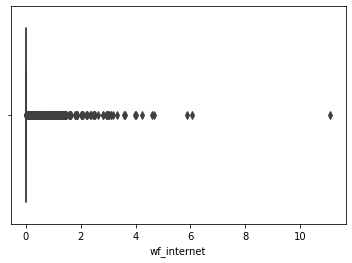

In [152]:
sns.boxplot(x=df['wf_internet'])

<AxesSubplot:xlabel='capital_run_length_total'>

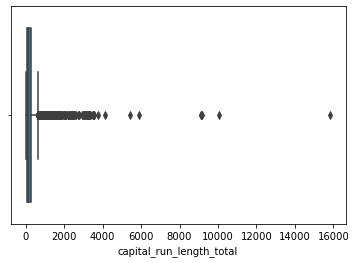

In [153]:
sns.boxplot(x=df['capital_run_length_total'])

In [139]:
# # Function That removes every outlier at once

# def iqr(dataframe):
#     dataframe = df1

#     for i in df1.columns:
#         q1 = df1[i].quantile(0.25)
#         q3 = df1[i].quantile(0.75)

#         IQR = q3 - q1

#         lower_limit = q1 - 1.5 * IQR
#         upper_limit = q3 + 1.5 * IQR

#         df1 = df1[(df1[i] < upper_limit) & (df1[i] > lower_limit)]
    

#     return df.shape

Tried a function that automatically removes outliers and was left with nothing

# EDA

## Univariate Analysis

In [68]:
# Run the df for reference
df

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [69]:
# Averages for everything as we have alot of columns
df.describe()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


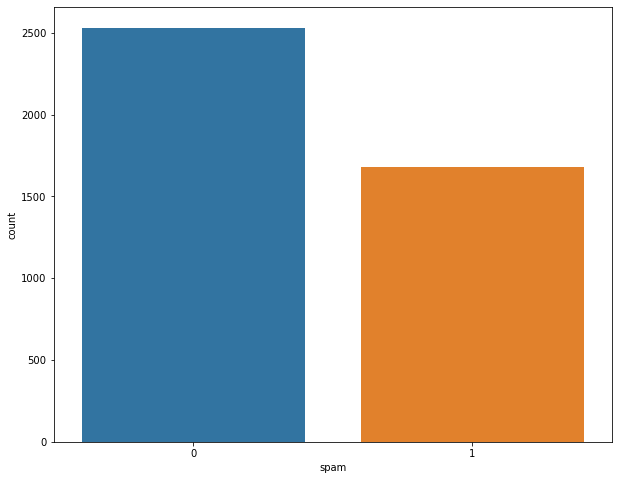

In [71]:
# Amount of spam emails
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='spam')
plt.show()

## Bivariate Analysis

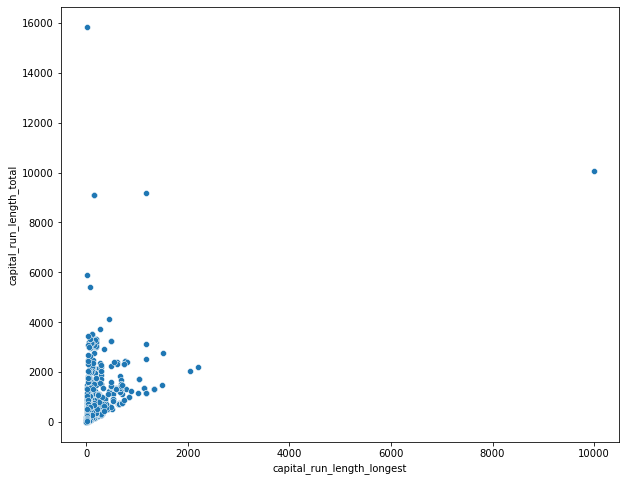

In [72]:
# Compare capital run length vs total
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='capital_run_length_longest', y='capital_run_length_total')
plt.show()

No observable relationship

## Correlations

In [73]:
df.corr()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
wf_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
wf_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
wf_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
wf_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
wf_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
wf_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
wf_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
wf_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
wf_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
wf_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


<AxesSubplot:>

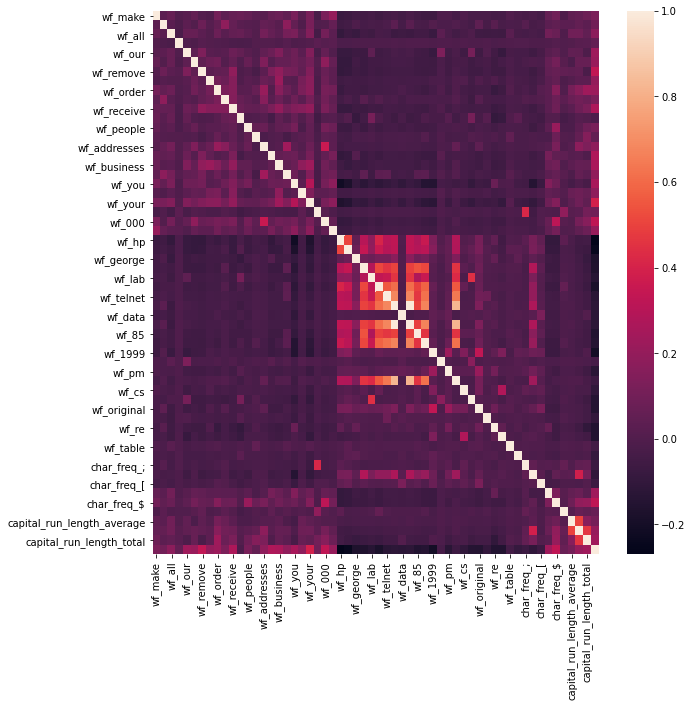

In [75]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

# Feature Reduction

A common and kinda annoying thing I observed is that the dataset has way too much columns, therefore we will attempt to reduce them

## VIF

In [76]:
# Will use VIF to help us interprete and reduce features
def vif(df): 

  df_vif = pd.DataFrame()
  df_vif['feature'] = df.columns
  df_vif['VIF Score'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return df_vif

In [77]:
vif(df)

,feature,VIF Score
0,wf_make,1.229479
1,wf_address,1.173693
2,wf_all,1.412062
3,wf_3d,1.010556
4,wf_our,1.375990
5,wf_over,1.210145
6,wf_remove,1.298680
7,wf_internet,1.191505
8,wf_order,1.320210
9,wf_mail,1.276496


Will drop wf_857 and wf_415 as they have high VIF scores

In [78]:
df = df.drop(['wf_857', 'wf_415'], axis=1)

In [79]:
vif(df)

,feature,VIF Score
0,wf_make,1.225296
1,wf_address,1.160105
2,wf_all,1.410424
3,wf_3d,1.010535
4,wf_our,1.375470
5,wf_over,1.209898
6,wf_remove,1.298578
7,wf_internet,1.190924
8,wf_order,1.319898
9,wf_mail,1.274505


The VIF scores are ok but still too much columns

Will do LDA

## LDA

In [176]:
# Split the data
X = df.loc[:, 'wf_make' : 'capital_run_length_total'].values
y = df['spam'].values

array([1, 1, 1, ..., 0, 0, 0])

In [160]:
# Will perform Naive Bayes before LDA and after and compare performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))



Accuracy of our 80-20 model is :  0.8182897862232779

*************************************************

Confusion matrix :  [[431  61]
 [ 92 258]]


It has an 81% accuracy before LDA

In [173]:
# Naive Bayes with LDA
# lda = LinearDiscriminantAnalysis(n_components=1)

# X = lda.fit_transform(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# NB2 = MultinomialNB()

# NB2.fit(X_train, y_train)

# y_pred = NB2.predict(X_test)

# # Check Accuracy
# print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

# print('\n*************************************************')

# print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

Got an error claiming Multinomial cannot work on the X as some values are negative, random forest might be ideal but not required in this exercise

## Naive bayes with sets divided in 70-30 ratio

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

Accuracy of our 80-20 model is :  0.8044338875692795

*************************************************

Confusion matrix :  [[653 111]
 [136 363]]


Accuracy went down by a small margin

## Naive bayes with sets divided in 60-40 ratio

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')


Accuracy of our 80-20 model is :  0.7969121140142518

*************************************************


Accuracy reduced as well, meaning that if we reduce the amount of data training the model, the accuracy will reduce

# Model Optimization

In [184]:
# Attempt to normalize the values and perform Naive Bayes
scaler = Normalizer()

X1 = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')



Accuracy of our 80-20 model is :  0.6068883610451307

*************************************************


The accuracy reduced dramatically after normalizing, proving its not a good idea to implement here

In [185]:
# Our best performing model is the default Multinomial NB with test and training data split in 80:20 ratio-> 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NB = MultinomialNB()

NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

Accuracy of our 80-20 model is :  0.8171021377672208

*************************************************

Confusion matrix :  [[437  60]
 [ 94 251]]


Accuracy of 81%

Our model has an 81% probability of detecting spam email, which works great